## Visualizing Data

In [1]:
import numpy as np
import pandas as pd
from plyfile import PlyData
import open3d as o3d
import matplotlib.pyplot as plt
import os

In [2]:
ply_path = "../Dataset/datachallengecode/data/xtrain/SCAN_1.ply"
plydata = PlyData.read(ply_path)

print(plydata)

ply
format binary_little_endian 1.0
element points 2488320
property float x
property float y
property float z
element rgb 2488320
property uchar r
property uchar g
property uchar b
element intensity 2488320
property uchar i
end_header


In [3]:

# Get x, y, z from "points" element
x = np.array(plydata['points']['x'])
y = np.array(plydata['points']['y'])
z = np.array(plydata['points']['z'])

# Get RGB from "rgb" element
r = np.array(plydata['rgb']['r'])
g = np.array(plydata['rgb']['g'])
b = np.array(plydata['rgb']['b'])

# Get intensity from "intensity" element
intensity = np.array(plydata['intensity']['i'])

# Stack point cloud data
points = np.vstack((x, y, z)).T
colors = np.vstack((r, g, b)).T / 255.0

In [4]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Launch interactive 3D viewer
o3d.visualization.draw_geometries([pcd])

In [5]:
ytrain = pd.read_csv("../Dataset/datachallengecode/data/ytrain.csv", header=None)
ytrain.columns = ["points","class"]

map_station = pd.read_csv("../Dataset/datachallengecode/data/ytrain_map_ind_station.csv", header=None)
map_station.columns = ['station_id', 'point_id_low', 'point_id_high']

In [6]:
print(ytrain)

          points  class
0              0      8
1              1      8
2              2      8
3              3      8
4              4      9
...          ...    ...
4856605  4856605      8
4856606  4856606      8
4856607  4856607      8
4856608  4856608      8
4856609  4856609      8

[4856610 rows x 2 columns]


In [7]:
station_id = 1 
row = map_station[map_station["station_id"] == station_id].iloc[0]
start_idx = row["point_id_low"]
end_idx = row["point_id_high"]

print(start_idx, end_idx)
print("Expected number of points:", end_idx - start_idx + 1)

2368290 4856609
Expected number of points: 2488320


In [8]:
# Define point range for SCAN_1
start_idx = 2368290
end_idx = 4856609

# Extract class labels
station_labels = ytrain[(ytrain["points"] >= start_idx) & (ytrain["points"] <= end_idx)]["class"].values

print("Number of labels:", len(station_labels))

Number of labels: 2488320


## Exploratory Data Analysis

#### 	1.	Class Distribution
####	2.	Z-Height Distribution (how tall is the structure)
####	3.	Intensity Distribution per Class
####	4.	3D Visualization (colored by class)


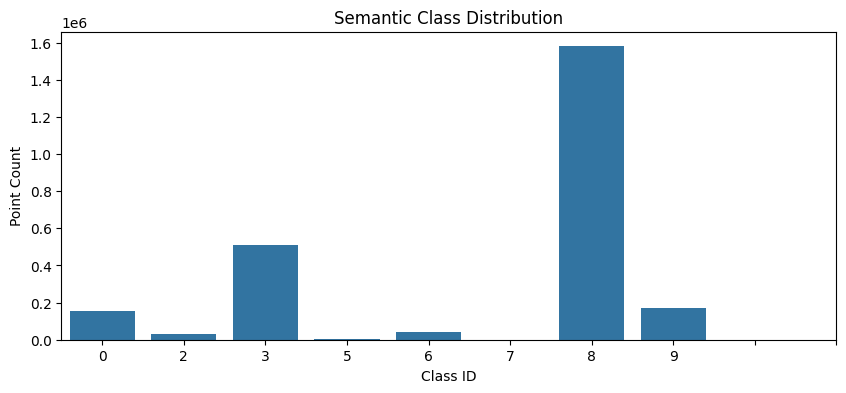

In [10]:
# Class distribution

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 4))
sns.countplot(x=station_labels)
plt.title("Semantic Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Point Count")
plt.xticks(np.arange(10))
plt.show()


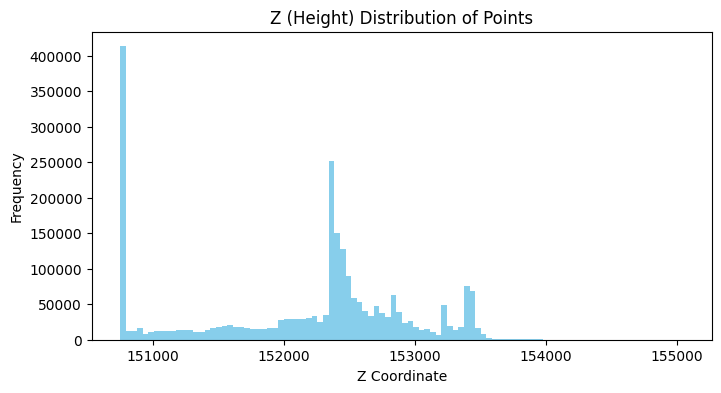

In [ ]:
# Z-height Distribution

plt.figure(figsize=(8, 4))
plt.hist(z, bins=100, color='skyblue')
plt.title("Z (Height) Distribution of Points")
plt.xlabel("Z Coordinate")
plt.ylabel("Frequency")
plt.show()


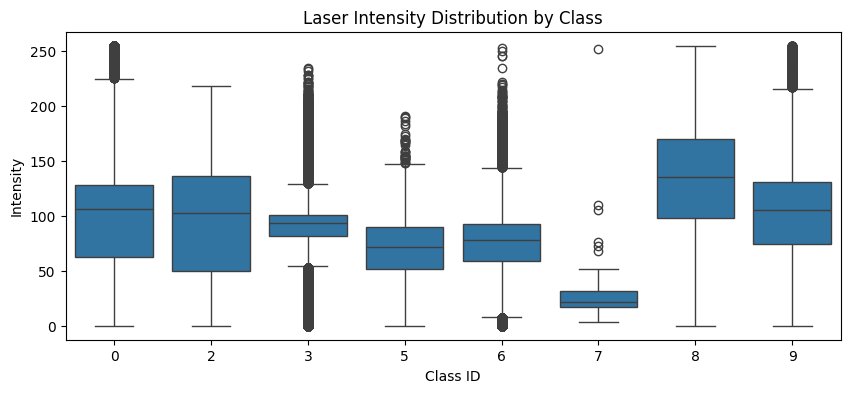

In [12]:
# Intensity Distribution per class
import pandas as pd

# Create DataFrame for grouped plotting
eda_df = pd.DataFrame({
    'intensity': intensity,
    'class': station_labels
})

plt.figure(figsize=(10, 4))
sns.boxplot(x='class', y='intensity', data=eda_df)
plt.title("Laser Intensity Distribution by Class")
plt.xlabel("Class ID")
plt.ylabel("Intensity")
plt.show()

In [ ]:
#how class segments are distributed spatially in the 3D space

import open3d as o3d
import matplotlib.cm as cm

colormap = cm.get_cmap('tab10')
label_colors = colormap(station_labels / 9.0)[:, :3]  # Normalize to [0, 1]

pcd.colors = o3d.utility.Vector3dVector(label_colors)
o3d.visualization.draw_geometries([pcd])

/var/folders/75/pszppd396yj9l4_4qkhrzpjr0000gn/T/ipykernel_58512/3960742568.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10')
